### 선형 회귀
- 목표: 공부시간으로 시험 점수 예측
- 데이터셋		: 임의
- 피쳐/속성		: 공부시간
- 타겟			: 점수
- 학습방법		: 지도학습/회귀
- 학습알고리즘	: 선형 	<== [조건] 데이터 분포 ~ 선형

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#### [1] 데이터 준비

In [31]:
jumsu = range(7, 100, 7)
print(jumsu)

hour = range(1, 29, 2)
print(hour)

range(7, 100, 7)
range(1, 29, 2)


In [40]:
# 피쳐 변수 2D
hourDF = pd.DataFrame( hour, columns=['Hour'])
print( hourDF.head(3) )
print()
print(f'피쳐 변수 차원: {hourDF.shape}')

   Hour
0     1
1     3
2     5

피쳐 변수 차원: (14, 1)


In [38]:
# 타겟 변수 1D
jumsuSR = pd.Series(jumsu)
print(jumsuSR.head(3))
print()
print(f'타겟 변수 차원: {jumsuSR.shape}')

0     7
1    14
2    21
dtype: int64

타겟 변수 차원: (14,)


#### [2] 생성 데이터 분포 확인

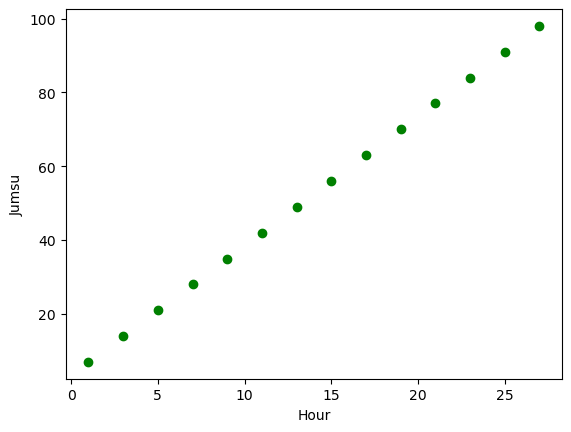

In [34]:
plt.plot(hourDF,jumsuSR, 'go')
plt.xlabel("Hour")
plt.ylabel("Jumsu")
plt.show()

#### 모델 생성 & 학습

In [41]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [42]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [43]:
# 학습 진행
model.fit(hourDF, jumsuSR)				# 직선의 기울기 & 절편 값 반환

LinearRegression()

In [44]:
# 학습 후 모델 파라미터
print(f'기울기: {model.coef_}	절편: {model.intercept_}')

기울기: [3.5]	절편: 3.499999999999993


In [56]:
# y=ax+b
pre_jumsu = model.coef_[0] * hourDF + model.intercept_				# ndarray ()
print(type(pre_jumsu['Hour']))
# print(pre_jumsu.)

# 1D array 화
pre_jumsu = pre_jumsu['Hour'].values.reshape(-1)										# 1D array 화

<class 'pandas.core.series.Series'>


In [ ]:
# 실제 점수 & 예측 점수 차이
real_jumsu = jumsuSR.to_numpy()
real_jumsu - pre_jumsu

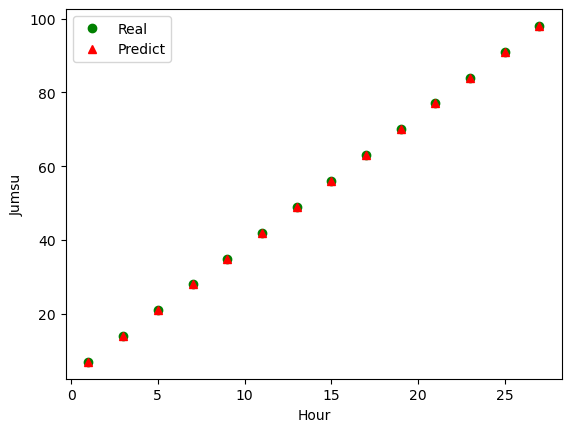

In [62]:
plt.plot(hourDF,jumsuSR, 'go', label='Real')
plt.plot(hourDF,pre_jumsu, 'r^', label='Predict')
plt.xlabel("Hour")
plt.ylabel("Jumsu")
plt.legend()
plt.show()

#### [3] 모델 성능 평가

In [ ]:
model.score(hourDF, pre_jumsu)

In [ ]:
model.score(hourDF, jumsuSR)				# true Y 선언!!

#### [4] Cost/Loss ft & 오차 계산
- root_mean_square_error --> v1.4이상 only

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
predict_y = model.predict(hourDF)

In [59]:
# 에러 계산 인스턴스 생성
mse = mean_squared_error(jumsuSR, predict_y)					# 예측값 & 실제값 차이 지표 
rmse = mean_squared_error(jumsuSR,predict_y, squared=False)
mae = mean_absolute_error(jumsuSR, predict_y)

r2 = r2_score(jumsuSR, predict_y)								# 예측값 & 실제값 일치도 지표 계수

In [60]:
# 손실/비용 함수 ~0 일수록
# 결정계수(r2) ~1  일수록 		--> 성능이 좋음

print(f'mse:	{mse}')
print(f'rmse:	{rmse}')
print(f'mae:	{mae}')
print(f'r2:		{r2}')

mse:	7.437831392083826e-30
rmse:	2.727238785307188e-15
mae:	1.395708945243054e-15
r2:		1.0
